In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


## Importing our data

In [2]:
df_raw = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df_raw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's take a quick look at our data

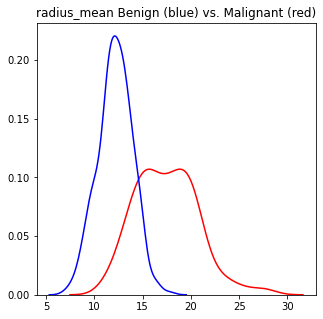

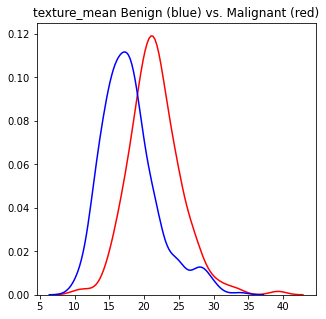

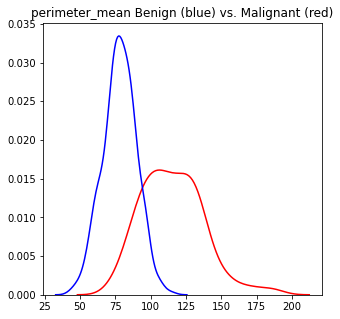

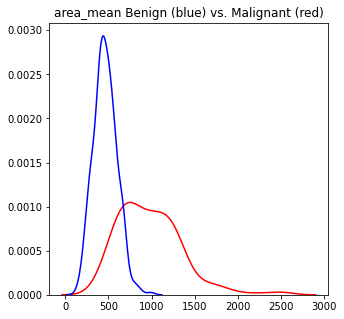

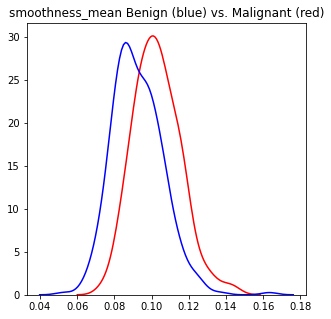

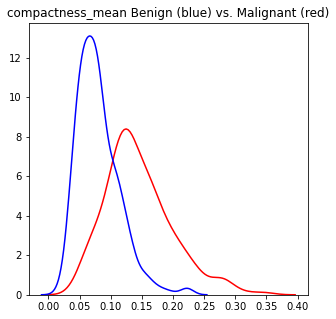

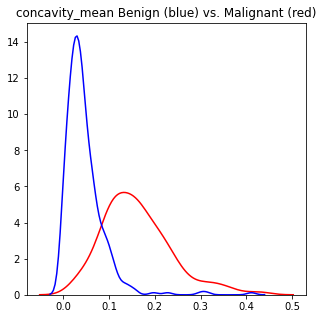

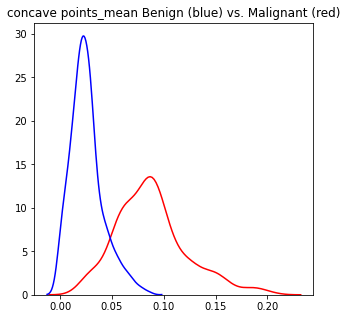

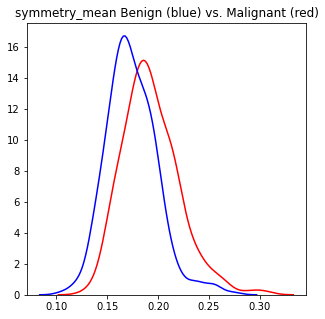

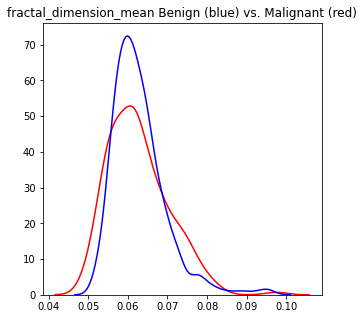

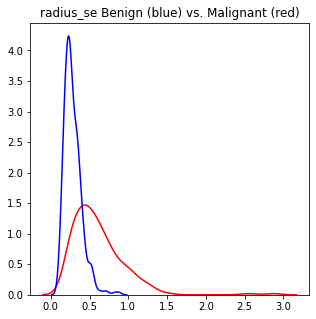

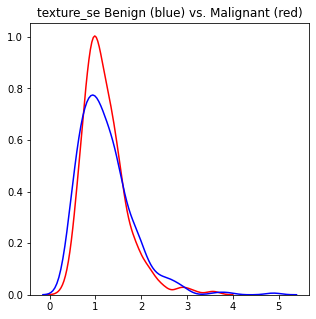

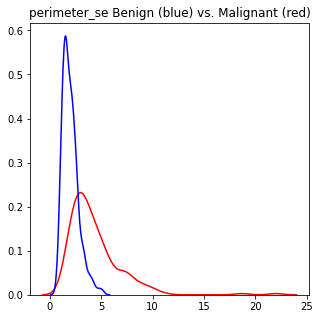

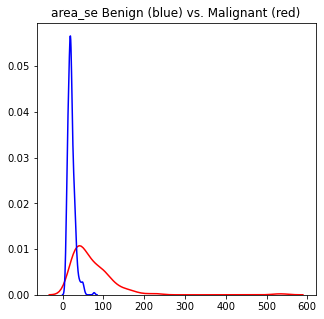

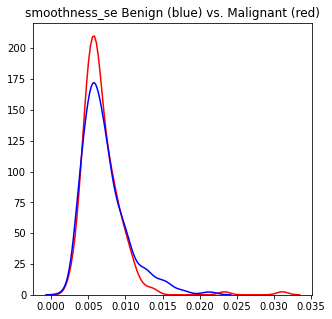

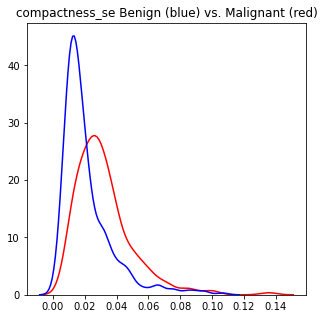

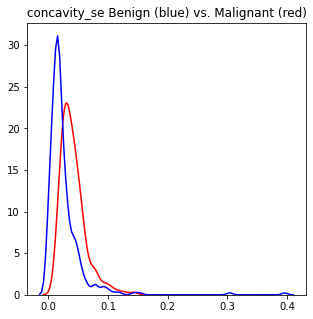

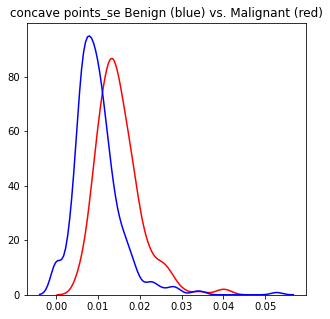

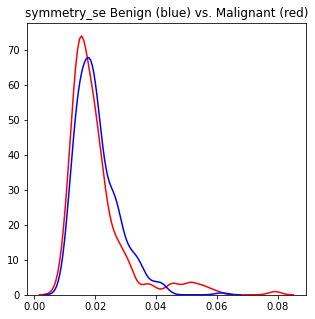

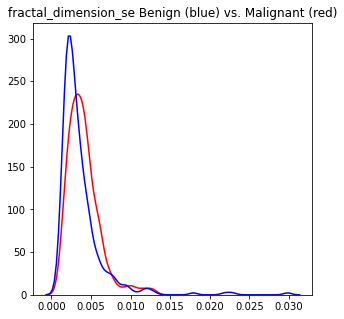

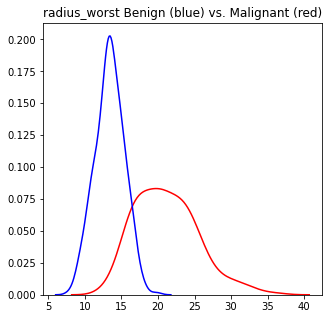

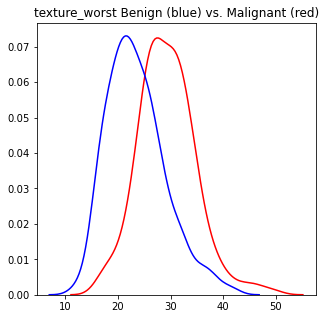

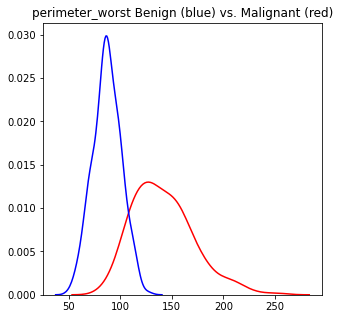

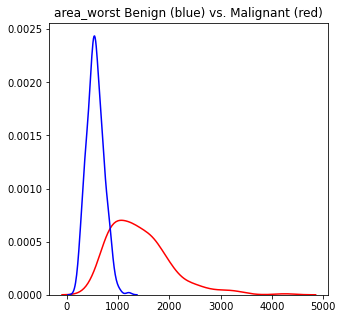

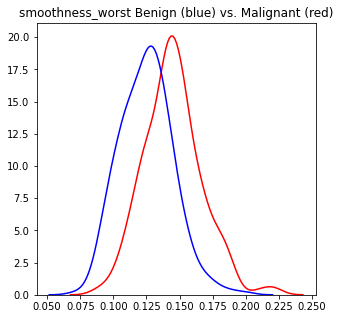

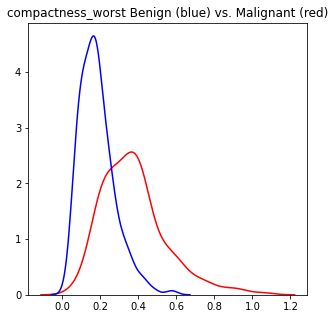

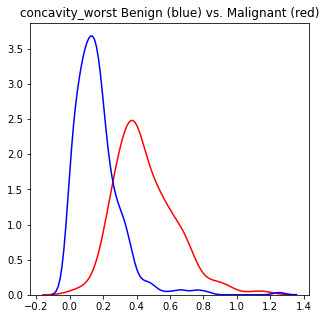

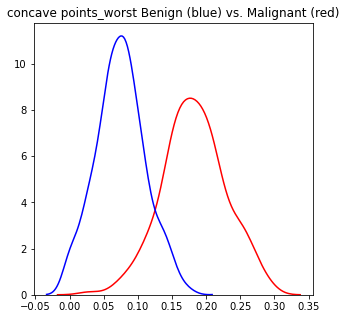

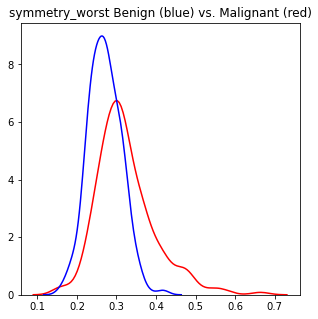

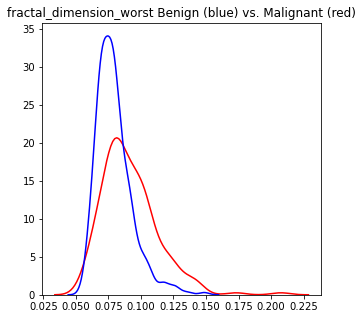

In [3]:
df_malignant = df_raw.loc[df_raw['diagnosis'] == 'M']
df_benign = df_raw.loc[df_raw['diagnosis'] == 'B']

for column in df_raw.columns:
    if column not in  ['id', 'diagnosis', 'Unnamed: 32']:
        plt.figure(figsize = (5, 5))

        sns.distplot(a = df_malignant[[column]], hist = False, color = 'red')
        sns.distplot(a = df_benign[[column]], hist = False, color = 'blue')
        
        plt.title(column + ' Benign (blue) vs. Malignant (red)')
        plt.show()

## Nothing seems out of the ordinary, so let's proceed with processing our data. We will try to standardize our data, perform our train/test split, then develop a Logistc Regression Model.

## Now let's process our dataframe. To get our data ready, we will do the following:
- Replace missing data
- Remove unecessary columns
- Relabel our target column to 0's and 1's (for prediction)
- Remove unecessary columns (id, unnamed)
- Standardize our numerical columns (the math behind ML algorithms work better when our numerical values are standardized. For each column, the data will be centered around 0 and 68% of the data will be between -1 and 1

In [4]:
df_processed = df_raw.copy()

#Dropping unecessary columns
df_processed.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

#Renaming Malignant to 1, and Benign to 0
df_processed.diagnosis.replace({'M': 1, 'B': 0}, inplace = True)

#Looking at how many NaN's we have (we have none)
print('Number of NaNs (we have none)')
print(df_processed.isnull().sum())

#Standard Scaling our Data
input_features = list(df_processed.columns)
input_features.remove('diagnosis')

df_processed[input_features] = StandardScaler().fit_transform(df_processed[input_features])
        
df_processed.head()

Number of NaNs (we have none)
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Performing our train/test split

In [5]:
x = df_processed[input_features].values
y = df_processed['diagnosis'].values 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 36)

## Prediction using a simple Logistic Regressor

### Logsitic Regression is similar to Linear Regression, except that instead of a line being fit to our data, a probability curve is fit instead. This curve is determined the same way that a Linear Regression line is determined - through minimizing a specific function. The specifics of the curve are also determine based on the hyperparameters of the model (of which there are many). As an example, if our input data for a patient corresponds to a 50% + chance of having a malignant tumor, then our model would determine that the tumor of that patient is malignant. Similariy, if our input variables correspond to a 50% - chance of having a malginant tumor, then our model would determine that the tumor is benign.

### There are a lot of hyperparameters we can adjust for our Logistic Regressor. We could do a deep dive into each one of parameters and the math behind it, but in some cases (like this one) it's easier to do a brute force method. So, we will split our training data using 3-cross fold validation, and we will use GridCV to try every combination of parameters available to find the one with the highest accuracy. 

In [6]:
#Creating our model
model = LogisticRegression()

#The parameters to loop through
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

#Creating our GridSearchCV
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

#Finding our best model
best_model = clf.fit(x_train, y_train)
print('Best Model Parameters: ')
print(best_model.best_estimator_)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1624 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 2908 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 4300 tasks      | elapsed:  1.5min


Best Model Parameters: 
LogisticRegression(C=0.08858667904100823, solver='liblinear')


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  1.8min finished


In [7]:
#Creating our model with the best hyperparameters
final_model = LogisticRegression(C=0.08858667904100823, solver = 'liblinear')

#Fitting our model to our test data
final_model.fit(x_train, y_train)

#Making our predictions
y_pred = final_model.predict(x_test)

## Let's look at how our model performed

In [8]:
#Calculating our precision, recall, and fscore
scores = precision_recall_fscore_support(y_test, y_pred, average = 'binary')


print('Model Accuracy: ', final_model.score(x_test, y_test))
print('Model Precision: ', scores[0])
print('Model Recall: ', scores[1])
print('Model F1-score: ', scores[2])

print('-----------------------------------------------')
print('Model Accuracy is the % of correct predictions')
print('Model Precision is (TP / TP + FP), or the likelihood that our next positive prediction will be accurate')
print('Model Recall is (TP / TP + FN), or the % of true positives that we correctly predicted')
print('Model F1-score is a useful metric that takes Precision and Recall into account')

Model Accuracy:  0.9912280701754386
Model Precision:  1.0
Model Recall:  0.9743589743589743
Model F1-score:  0.9870129870129869
-----------------------------------------------
Model Accuracy is the % of correct predictions
Model Precision is (TP / TP + FP), or the likelihood that our next positive prediction will be accurate
Model Recall is (TP / TP + FN), or the % of true positives that we correctly predicted
Model F1-score is a useful metric that takes Precision and Recall into account


A Confusion Matrix is also a good way to look at how a model is performing. The boxes in the diagonal from the top left to the bottom right are for the correct predictions. All other boxes are incorrect predictions.


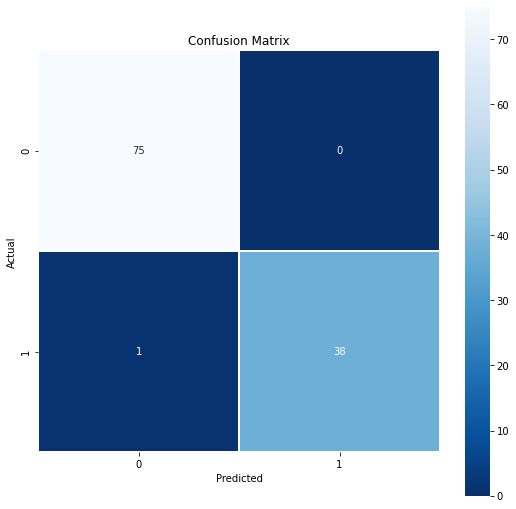

In [9]:
print('A Confusion Matrix is also a good way to look at how a model is performing. The boxes in the diagonal from the top left to the bottom right are for the correct predictions. All other boxes are incorrect predictions.')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('Confusion Matrix');

## It looks like our model is performing well. It has an accuracy, precision, recall, and F-1 score of 0.99, 1.0, 0.97, and 0.98. This is also visualized in our confusion matrix. 

# Summary

## Through the course of this problem, we have done the following:
## - Performed an exploratory analysis of our data
## - Performed data pre-processing (data standardization, etc.)
## - Split our data into a training and testing dataset
## - Used GridCV with 3-cross fold validation on our training dataset to find the most optimal hyperparameters
## - Developed a Logistic Regression model with the best hyperparameters
## - Evaluated the results of the model on our test dataset